#  Installing and Importing the Required Libraries

In [ ]:
!pip install scikit-learn gensim numpy matplotlib IPython

In [1]:
#Importing the libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from gensim import models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from gensim.models import FastText as ft
from IPython.display import Image
import os

#  Importing the data

In [2]:
df = pd.read_csv("Rec_sys_content.csv")
# Viewing Top 5 Rows
df.head(5)

,StockCode,Product Name,Description,Category,Brand,Unit Price
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,"New unique design, great gift.High quality pla...",Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Rounded rectangular cat-eye reading glasses. T...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,Each Nintendo 2DS kit is printed with super-hi...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,The sheerest compression stocking in its class...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38
4,84836,Stupell Industries Chevron Initial Wall D cor,Features: -Made in the USA. -Sawtooth hanger o...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99


In [ ]:
# Data Info
df.info()

In [ ]:
# Total Null Values in Data
df.isnull().sum(axis = 0)

# Droping Null Values
df.dropna().reset_index(inplace = True)

In [ ]:
# Data Shape
df.shape

In [ ]:
df

## Importing Count Vectorizer and TFIDF

In [ ]:
# Importing Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english')


# Importing IFIDF
tfidf_vec = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,3))

# Preprocessing

In [ ]:
# Combining Product and Description
df['Description'] = df['Product Name'] + ' ' +df['Description']

# Dropping Duplicates and keeping first record
unique_df = df.drop_duplicates(subset=['Description'], keep='first')

# Converting String to Lower Case
unique_df['desc_lowered'] = unique_df['Description'].apply(lambda x: x.lower()) 

# Remove Stop special Characters
unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Coverting Description to List
desc_list = list(unique_df['desc_lowered'])

In [ ]:
unique_df= unique_df.reset_index(drop=True)

In [ ]:
unique_df.reset_index(inplace=True)

# Similarity Measures

## Manhattan distance 

It is calculated as the sum of the absolute differences between the two vectors.



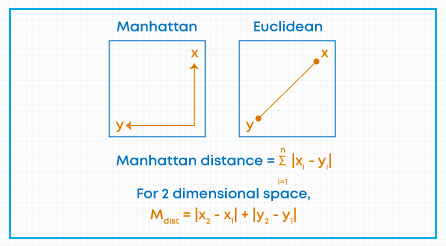

## Euclidean distance 

It is calculated as the square root of the sum of the squared differences between the two vectors.


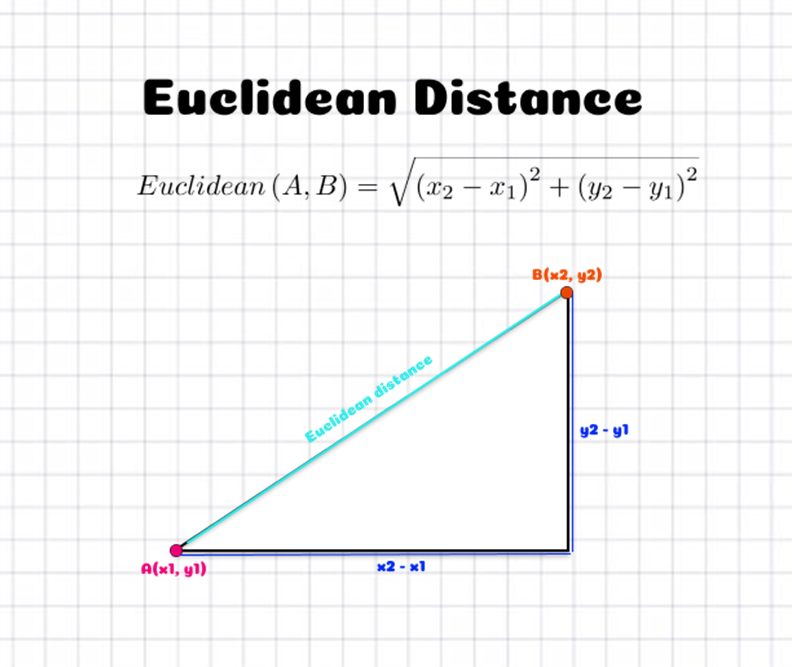

## Cosine similarity 


It is the cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes).


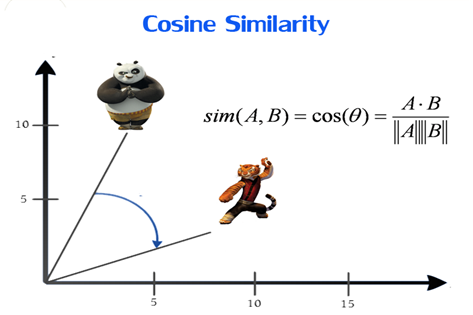


# Functions for Ranking

In [ ]:
def find_euclidean_distances(sim_matrix, index, n=10): 

    # Getting Score and Index
    result = list(enumerate(sim_matrix[index]))

    # Sorting the Score and taking top 10 products
    sorted_result = sorted(result,key=lambda x:x[1],reverse=False)[1:10+1]

    # Mapping index with data
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
    
    return similar_products

In [ ]:
def find_similarity(cosine_sim_matrix, index, n=10):
    
    # calculate cosine similarity between each vectors
    result = list(enumerate(cosine_sim_matrix[index]))
    
    # Sorting the Score
    sorted_result = sorted(result,key=lambda x:x[1],reverse=True)[1:n+1]
    
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
     
    return similar_products


In [ ]:
def find_manhattan_distance(sim_matrix, index, n=10):   
     
    # Getting Score and Index
    result = list(enumerate(sim_matrix[index]))

    # Sorting the Score and taking top 10 products
    sorted_result = sorted(result,key=lambda x:x[1],reverse=False)[1:10+1]
    
    # Mapping index with data
    similar_products =  [{'value': unique_df.iloc[x[0]]['Product Name'], 'score' : round(x[1], 2)} for x in sorted_result]
    
    return similar_products



# Recommendation functions using various features

# Count Vectorizer

CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors. CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 
Eg.
document = [ “One Geek helps Two Geeks”, “Two Geeks help Four Geeks”, “Each Geek helps many other Geeks at GeeksforGeeks.”]

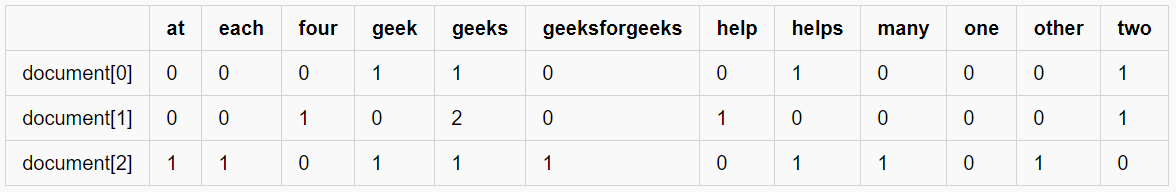

In [ ]:
product_id = 'Vickerman 14" Finial Drop Christmas Ornaments, Pack of 2'

In [ ]:
# Comparing similarity to get the top matches using count Vec

def get_recommendation_cv(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    index = list(row.index)[0]
    description = row['desc_lowered'].loc[index]

    #Create vector using Count Vectorizer

    count_vector = count_vectorizer.fit_transform(desc_list)
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(count_vector)
        products = find_similarity(sim_matrix , index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(count_vector)
        products = find_manhattan_distance(sim_matrix , index)
        
    else:
        sim_matrix = euclidean_distances(count_vector)
        products = find_euclidean_distances(sim_matrix , index)

    return products


In [ ]:
# Cosine Similarity 
get_recommendation_cv(product_id, unique_df, similarity = "cosine", n=5)


In [ ]:
# Manhattan Similarity 
get_recommendation_cv(product_id, unique_df, similarity = "manhattan", n=5)


In [ ]:
# Euclidean Similarity 
get_recommendation_cv(product_id, unique_df, similarity = "euclidean", n=10)


# tf-Idf

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.


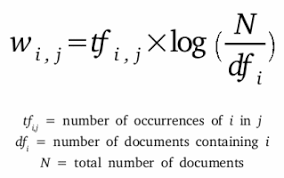

documentA = 'the man went out for a walk'

documentB = 'the children sat around the fire'


 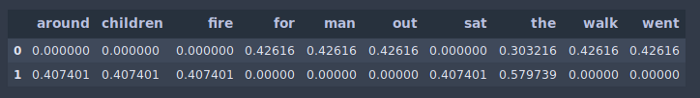

In [ ]:
# Comparing similarity to get the top matches using TF-IDF

def get_recommendation_tfidf(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    index = list(row.index)[0]
    description = row['desc_lowered'].loc[index]

    #Create vector using tfidf
    
    tfidf_matrix = tfidf_vec.fit_transform(desc_list)
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(tfidf_matrix)
        products = find_similarity(sim_matrix , index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(tfidf_matrix)
        products = find_manhattan_distance(sim_matrix , index)
        
    else:
        sim_matrix = euclidean_distances(tfidf_matrix)
        products = find_euclidean_distances(sim_matrix , index)

    return products



In [ ]:
# Cosine Similarity 
get_recommendation_tfidf(product_id, unique_df, similarity = "cosine", n=10)


In [ ]:
# Manhattan Similarity 
get_recommendation_tfidf(product_id, unique_df, similarity = "manhattan", n=10)


In [ ]:
# Euclidean Similarity 
get_recommendation_tfidf(product_id, unique_df, similarity = "euclidean", n=10)


# co-occurrence matrix

The purpose of this matrix is to present the number of times each word appears in the same context. .

Roses are red. Sky is blue.

We'll have the following matrix as below:

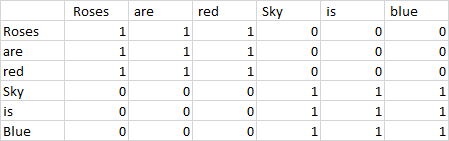


In [ ]:
# create cooccurence matrix

#preprocessing
df = df.head(250)
# Combining Product and Description
df['Description'] = df['Product Name'] + ' ' +df['Description']
unique_df = df.drop_duplicates(subset=['Description'], keep='first')
unique_df['desc_lowered'] = unique_df['Description'].apply(lambda x: x.lower())  
unique_df['desc_lowered'] = unique_df['desc_lowered'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
desc_list = list(unique_df['desc_lowered'])

co_ocr_vocab = []
for i in desc_list:
    [co_ocr_vocab.append(x) for x in i.split()]

co_occur_vector_matrix = np.zeros((len(co_ocr_vocab), len(co_ocr_vocab)))

for _, sent in enumerate(desc_list):
    words = sent.split()
    for index, word in enumerate(words):
        if index != len(words)-1:
            co_occur_vector_matrix[co_ocr_vocab.index(word)][co_ocr_vocab.index(words[index+1])] += 1


In [ ]:
# Comparing similarity to get the top matches using cooccurence matrix

def get_recommendation_coccur(product_id, df, similarity, n=10):

    row = df.loc[df['Product Name'] == product_id]
    input_index = list(row.index)[0]
    description = row['desc_lowered'].loc[input_index]

    vector_matrix = np.empty((len(desc_list), len(co_ocr_vocab)))
    for index, each_sentence in enumerate(desc_list):  
        sentence_vector = np.zeros((len(co_ocr_vocab),))
        count  = 0
        for each_word in each_sentence.split(): 
            try:
                sentence_vector += co_occur_vector_matrix[co_ocr_vocab.index(each_word)]
                count += 1
                
            except:
                continue
        
        vector_matrix[index] = sentence_vector/count
    
    
    if similarity == "cosine":
        sim_matrix = cosine_similarity(vector_matrix)
        products = find_similarity(sim_matrix , index)
        
    elif similarity == "manhattan":
        sim_matrix = manhattan_distances(vector_matrix)
        products = find_manhattan_distance(sim_matrix , index)
        
    else:
        sim_matrix = euclidean_distances(vector_matrix)
        products = find_euclidean_distances(sim_matrix , index)

    return products


In [ ]:
# Cosine Similarity 
get_recommendation_coccur(product_id, unique_df, similarity = "cosine", n=10)

In [ ]:
# Manhattan Similarity 
get_recommendation_coccur(product_id, unique_df, similarity = "manhattan", n=10)


In [ ]:
# Euclidean Similarity 
get_recommendation_coccur(product_id, unique_df, similarity = "euclidean", n=10)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(["This is a sample document.", "Machine learning is amazing."])

# 查看 IDF 值
idf_values = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
print(idf_values)


In [ ]:
#co-occurrence matrix
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import normalize

# Example corpus
corpus = [
    "I love machine learning",
    "machine learning is great",
    "I love deep learning",
    "deep learning and machine learning are related"
]

# Tokenize the sentences
corpus = [sentence.lower().split() for sentence in corpus]

# Flatten the list of sentences into a single list of words
vocab = set([word for sentence in corpus for word in sentence])
vocab = sorted(vocab)  # Sorting for consistent order
vocab_size = len(vocab)

# Initialize an empty co-occurrence matrix
co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

# Define the window size
window_size = 2

# Create a mapping from word to index
word2idx = {word: i for i, word in enumerate(vocab)}

# Populate the co-occurrence matrix
for sentence in corpus:
    for i, word in enumerate(sentence):
        word_idx = word2idx[word]
        start = max(0, i - window_size)
        end = min(len(sentence), i + window_size + 1)
        
        for j in range(start, end):
            if i != j:
                context_word = sentence[j]
                context_idx = word2idx[context_word]
                co_occurrence_matrix[word_idx, context_idx] += 1

# Convert the matrix to a DataFrame for better visualization
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=vocab, columns=vocab)

# Normalize the co-occurrence matrix
co_occurrence_normalized = normalize(co_occurrence_matrix, norm='l1', axis=1)

# Convert the normalized matrix to a DataFrame for better visualization
co_occurrence_normalized_df = pd.DataFrame(co_occurrence_normalized, index=vocab, columns=vocab)

# Display the co-occurrence matrix
print("Co-occurrence Matrix:")
print(co_occurrence_df)

# Display the normalized co-occurrence matrix
print("\nNormalized Co-occurrence Matrix:")
print(co_occurrence_normalized_df)

In [ ]:
print(corpus)

In [ ]:
print(vocab)

In [ ]:
#n-gram
import nltk
from nltk.util import ngrams
from collections import Counter

# 確保下載正確的資源
nltk.download('punkt')

# 樣本文本
text = "The quick brown fox jumps over the lazy dog"

# 手動標記化（避免使用word_tokenize）
tokens = text.split()

# 生成單字元組 (1-gram)
unigrams = list(ngrams(tokens, 1))
print("Unigrams:")
print(unigrams)

# 生成雙字元組 (2-gram)
bigrams = list(ngrams(tokens, 2))
print("\nBigrams:")
print(bigrams)

# 生成三字元組 (3-gram)
trigrams = list(ngrams(tokens, 3))
print("\nTrigrams:")
print(trigrams)

# 計算每個n-gram的頻率
unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# 打印頻率
print("\nUnigram Frequencies:")
print(unigram_freq)
print("\nBigram Frequencies:")
print(bigram_freq)
print("\nTrigram Frequencies:")
print(trigram_freq)

In [ ]:
!pip install --force-reinstall nltk